3.1 视图  
3.1.1 什么是视图  
3.1.2 视图与表有什么区别  
3.1.3 为什么会存在视图  
3.1.4 如何创建视图  
3.1.5 如何修改视图结构  
3.1.6 如何更新视图内容  
3.1.7 如何删除视图  
3.2 子查询   
3.2.1 什么是子查询  
3.2.2 子查询和视图的关系  
3.2.3 嵌套子查询  
3.2.4 标量子查询  
3.2.5 标量子查询有什么用  
3.2.6 关联子查询  
小结  
练习题-第一部分    
3.1  
3.2  
3.3   
3.4  
3.3 各种各样的函数  
3.3.1 算数函数    
3.3.2 字符串函数  
3.3.3 日期函数   
3.3.4 转换函数  
3.4 谓词  
3.4.1 什么是谓词  
3.4.2 LIKE谓词 – 用于字符串的部分一致查询  
3.4.3 BETWEEN谓词 – 用于范围查询  
3.4.4 IS NULL、 IS NOT NULL – 用于判断是否为NULL  
3.4.5 IN谓词 – OR的简便用法  
3.4.6 使用子查询作为IN谓词的参数  
3.4.7 EXIST 谓词  
3.5 CASE 表达式  
3.5.1 什么是 CASE 表达式？  
3.5.2 CASE表达式的使用方法   
练习题-第二部分  
3.5  
3.6   
3.7   
 
SQL训练营页面地址：https://tianchi.aliyun.com/specials/promotion/aicampsql  
天池龙珠计划训练营地址：https://tianchi.aliyun.com/specials/promotion/aicamps  
    
之前接触了sql基本的查询用法，接下来介绍一些相对复杂的用法。  

# 3.1 视图
我们先来看一个查询语句（仅做示例，未提供相关数据）   

单从表面上看起来这个语句是和正常的从数据表中查询数据是完全相同的，但其实我们操作的是一个视图。所以从SQL的角度来说操作视图与操作表看起来是完全相同的，那么为什么还会有视图的存在呢？视图到底是什么？视图与表有什么不同呢？ 

## 3.1.1 什么是视图
视图是一个虚拟的表，不同于直接操作数据表，视图是依据SELECT语句来创建的（会在下面具体介绍），所以操作视图时会根据创建视图的SELECT语句生成一张虚拟表，然后在这张虚拟表上做SQL操作。

## 3.1.2 视图与表有什么区别
《sql基础教程 第2版》用一句话非常凝练的概括了视图与表的区别—“**是否保存了实际的数据**”。所以视图并不是数据库真实存储的数据表，它可以看作是一个窗口，通过这个窗口我们可以看到数据库表中真实存在的数据。所以我们要区别视图和数据表的本质，即视图是基于真实表的一张虚拟的表，其数据来源均建立在真实表的基础上。  
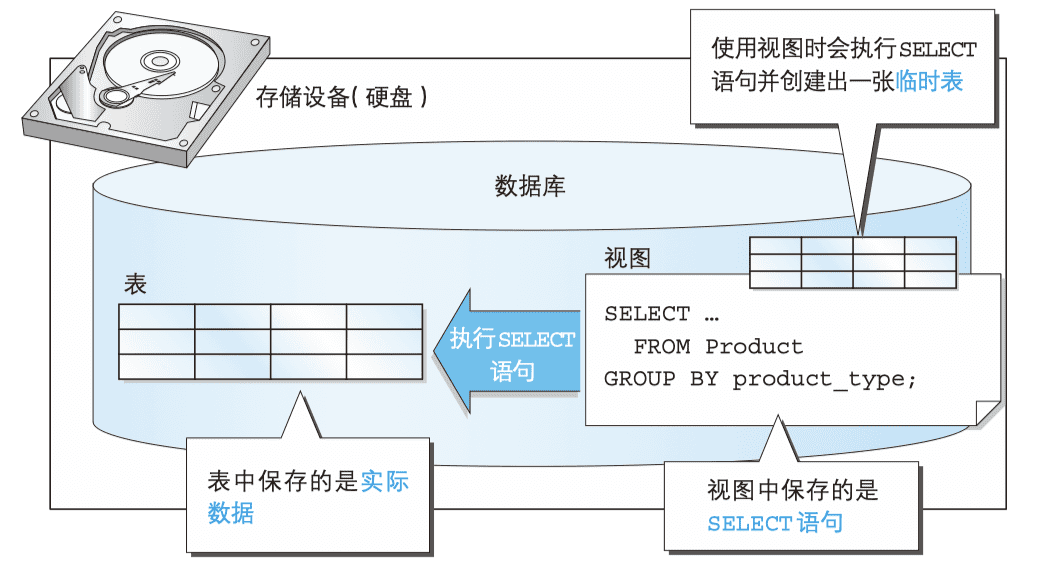  
图片来源：《sql基础教程第2版》  

下面这句顺口溜也方便大家记忆视图与表的关系：“**视图不是表，视图是虚表，视图依赖于表**”。  

## 3.1.4 如何创建视图
说了这么多视图与表的区别，下面我们就一起来看一下如何创建视图吧。  
创建视图的基本语法如下：  

其中SELECT 语句需要书写在 AS 关键字之后。 SELECT 语句中列的排列顺序和视图中列的排列顺序相同， SELECT 语句中的第 1 列就是视图中的第 1 列， SELECT 语句中的第 2 列就是视图中的第 2 列，以此类推。而且视图的列名是在视图名称之后的列表中定义的。
需要注意的是**视图名在数据库中需要是唯一**的，不能与其他视图和表重名。  

视图不仅可以基于真实表，我们也可以在视图的基础上继续创建视图。  
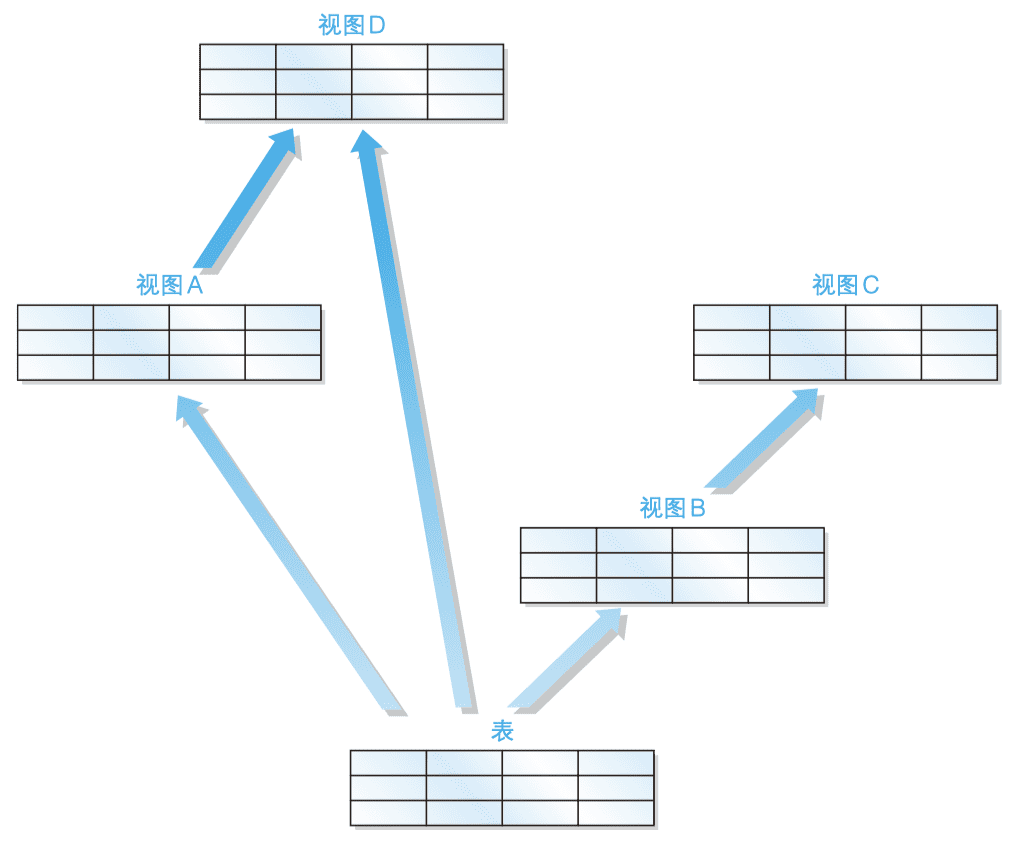  
图片来源：《sql基础教程第2版》  

虽然在视图上继续创建视图的语法没有错误，但是我们还是应该尽量避免这种操作。这是因为对多数 DBMS 来说， **多重视图会降低 SQL 的性能**。  

- 注意事项   

需要注意的是在一般的**DBMS中定义视图时不能使用ORDER BY语句**。下面这样定义视图是错误的。  

为什么不能使用 ORDER BY 子句呢？这是因为视图和表一样，数据行都是没有顺序的。  

在 MySQL中视图的定义是允许使用 ORDER BY 语句的，但是若从特定视图进行选择，而该视图使用了自己的 ORDER BY 语句，则视图定义中的 ORDER BY 将被忽略。  

- 基于单表的视图  

我们在product表的基础上创建一个视图，如下  

创建的视图如下图所示：  
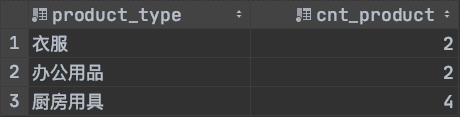

- 基于多表的视图  

为了学习多表视图，我们再创建一张表，相关代码如下：

我们在product表和shop_product表的基础上创建视图。

创建的视图如下图所示  
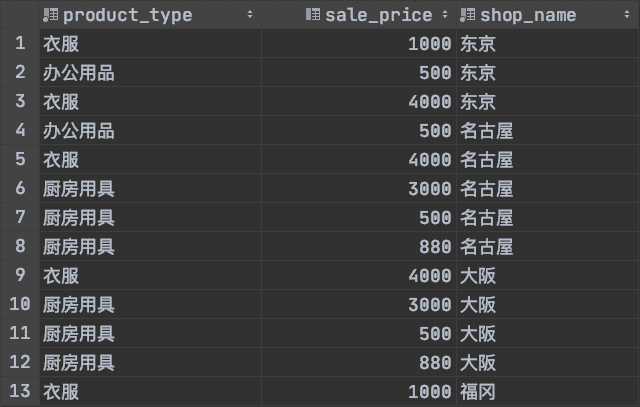

我们可以在这个视图的基础上进行查询

查询结果为：  
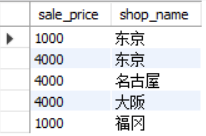

## 3.1.5 如何修改视图结构  
修改视图结构的基本语法如下：

其中视图名在数据库中需要是唯一的，不能与其他视图和表重名。  
当然也可以通过将当前视图删除然后重新创建的方式达到修改的效果。（对于数据库底层是不是也是这样操作的呢，你可以自己探索一下。）  

- 修改视图  

我们修改上方的productSum视图为  

此时productSum视图内容如下图所示   
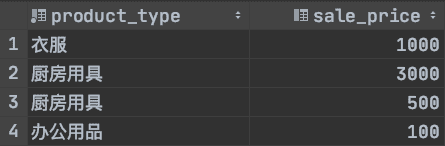

## 3.1.6 如何更新视图内容  
因为视图是一个虚拟表，所以对视图的操作就是对底层基础表的操作，所以在修改时只有满足底层基本表的定义才能成功修改。  

对于一个视图来说，如果包含以下结构的任意一种都是不可以被更新的：  

- 聚合函数 SUM()、MIN()、MAX()、COUNT() 等。
- DISTINCT 关键字。
- GROUP BY 子句。
- HAVING 子句。
- UNION 或 UNION ALL 运算符。
- FROM 子句中包含多个表。

视图归根结底还是从表派生出来的，因此，如果原表可以更新，那么 视图中的数据也可以更新。反之亦然，如果视图发生了改变，而原表没有进行相应更新的话，就无法保证数据的一致性了。  

- 更新视图

因为我们刚刚修改的productSum视图不包括以上的限制条件，我们来尝试更新一下视图  

此时我们再查看productSum视图，可以发现数据已经更新了  
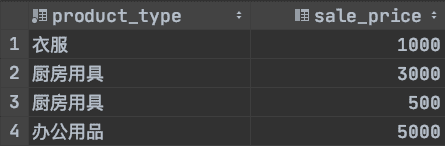  
此时观察原表也可以发现数据也被更新了  
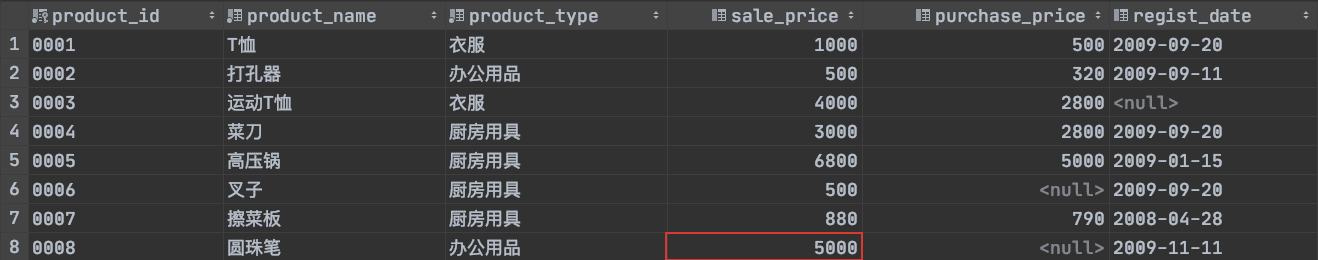  
不知道大家看到这个结果会不会有疑问，刚才修改视图的时候是设置product_type='办公用品'的商品的sale_price=5000，为什么原表的数据只有一条做了修改呢？  

还是因为视图的定义，视图只是原表的一个窗口，所以它修改也只能修改透过窗口能看到的内容。  

**注意：这里虽然修改成功了，但是并不推荐这种使用方式。而且我们在创建视图时也尽量使用限制不允许通过视图来修改表**  

## 3.1.7 如何删除视图
删除视图的基本语法如下：

注意：需要有相应的权限才能成功删除。  

- 删除视图

我们删除刚才创建的productSum视图

如果我们继续操作这个视图的话就会提示当前操作的内容不存在。

# 3.2 子查询
我们先来看一个语句（仅做示例，未提供相关数据）

这个语句看起来很好理解，其中使用括号括起来的sql语句首先执行，执行成功后再执行外面的sql语句。但是我们上一节提到的视图也是根据SELECT语句创建视图然后在这个基础上再进行查询。那么什么是子查询呢？子查询和视图又有什么关系呢？

## 3.2.2 子查询和视图的关系
子查询就是将用来定义视图的 SELECT 语句直接用于 FROM 子句当中。其中AS studentSum可以看作是子查询的名称，而且由于子查询是一次性的，所以子查询不会像视图那样保存在存储介质中， 而是在 SELECT 语句执行之后就消失了。

## 3.2.3 嵌套子查询
与在视图上再定义视图类似，子查询也没有具体的限制，例如我们可以这样

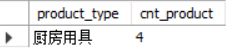  
其中最内层的子查询我们将其命名为productSum，这条语句根据product_type分组并查询个数，第二层查询中将个数为4的商品查询出来，最外层查询product_type和cnt_product两列。  
**虽然嵌套子查询可以查询出结果，但是随着子查询嵌套的层数的叠加，SQL语句不仅会难以理解而且执行效率也会很差，所以要尽量避免这样的使用。**

## 3.2.4 标量子查询
标量就是单一的意思，那么标量子查询也就是单一的子查询，那什么叫做单一的子查询呢？  

所谓单一就是要求我们执行的SQL语句只能返回一个值，也就是要返回表中具体的某一行的某一列。例如我们有下面这样一张表  

那么我们执行一次标量子查询后是要返回类似于，“0004”，“菜刀”这样的结果。

## 3.2.5 标量子查询有什么用
我们现在已经知道标量子查询可以返回一个值了，那么它有什么作用呢？  

直接这样想可能会有些困难，让我们看几个具体的需求：  

1. 查询出销售单价高于平均销售单价的商品
2. 查询出注册日期最晚的那个商品

你有思路了吗？  

让我们看如何通过标量子查询语句查询出销售单价高于平均销售单价的商品。  

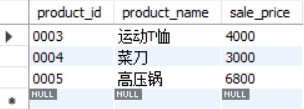

上面的这条语句首先后半部分查询出product表中的平均售价，前面的sql语句在根据WHERE条件挑选出合适的商品。  
由于标量子查询的特性，导致标量子查询不仅仅局限于 WHERE 子句中，通常任何可以使用单一值的位置都可以使用。也就是说， 能够使用常数或者列名的地方，无论是 SELECT 子句、GROUP BY 子句、HAVING 子句，还是 ORDER BY 子句，几乎所有的地方都可以使用。  

我们还可以这样使用标量子查询：  

你能猜到这段代码的运行结果是什么吗？运行一下看看与你想象的结果是否一致。  
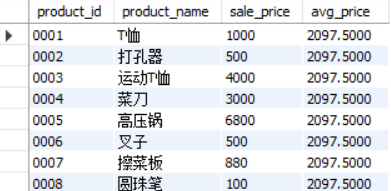

## 3.2.6 关联子查询
- 什么是关联子查询

关联子查询既然包含关联两个字那么一定意味着查询与子查询之间存在着联系。这种联系是如何建立起来的呢？  

我们先看一个例子：

你能理解这个例子在做什么操作么？先来看一下这个例子的执行结果  
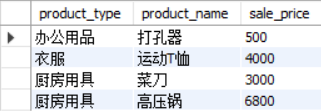  
通过上面的例子我们大概可以猜到吗，关联子查询就是通过一些标志将内外两层的查询连接起来起到过滤数据的目的，接下来我们就一起看一下关联子查询的具体内容吧。  

- 关联子查询与子查询的联系

还记得我们之前的那个例子么 `查询出销售单价高于平均销售单价的商品`，这个例子的SQL语句如下

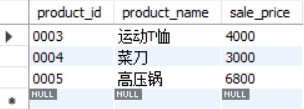

我们再来看一下这个需求 `选取出各商品种类中高于该商品种类的平均销售单价的商品` 。SQL语句如下：

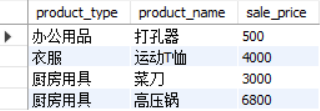

可以看出上面这两个语句的区别吗？  
在第二条SQL语句也就是关联子查询中我们将外面的product表标记为p1，将内部的product设置为p2，而且**通过WHERE语句连接了两个查询**。  

但是如果刚接触的话一定会比较疑惑关联查询的执行过程，这里有一个博客讲的比较清楚。在这里我们简要的概括为：  

1. 首先执行不带WHERE的主查询
2. 根据主查询讯结果匹配product_type，获取子查询结果
3. 将子查询结果再与主查询结合执行完整的SQL语句

在子查询中像标量子查询，嵌套子查询或者关联子查询可以看作是子查询的一种操作方式即可。

# 小结
视图和子查询是数据库操作中较为基础的内容，对于一些复杂的查询需要使用子查询加一些条件语句组合才能得到正确的结果。但是无论如何对于一个SQL语句来说都不应该设计的层数非常深且特别复杂，不仅可读性差而且执行效率也难以保证，所以尽量有简洁的语句来完成需要的功能。

# 练习题-第一部分
## 3.1
创建出满足下述三个条件的视图（视图名称为 ViewPractice5_1）。使用 product（商品）表作为参照表，假设表中包含初始状态的 8 行数据。  

- 条件 1：销售单价大于等于 1000 日元。
- 条件 2：登记日期是 2009 年 9 月 20 日。
- 条件 3：包含商品名称、销售单价和登记日期三列。

对该视图执行 SELECT 语句的结果如下所示。

执行结果  

## 3.2
向习题一中创建的视图 ViewPractice5_1 中插入如下数据，会得到什么样的结果呢？

解析：插⼊时将会报错。  
视图插⼊数据时，原表也会插⼊数据，⽽原表数据插⼊时不满⾜约束条件，所以会报错。（因为 `ViewPractice5_1` 的原表有三个带有 `NOT NULL` 约束的字段）

## 3.3
请根据如下结果编写 SELECT 语句，其中 sale_price_all 列为全部商品的平均销售单价。

## 3.4
请根据习题一中的条件编写一条 SQL 语句，创建一幅包含如下数据的视图（名称为AvgPriceByType）。

提示：其中的关键是 avg_sale_price 列。与习题三不同，这里需要计算出的是 `各商品种类的平均销售单价`。这与使用关联子查询所得到的结果相同。 也就是说，该列可以使用关联子查询进行创建。问题就是应该在什么地方使用这个关联子查询。



# 3.3 各种各样的函数
sql自带了各种各样的函数，极大提高了sql语言的便利性。  

所谓函数，类似一个黑盒子，你给它一个输入值，它便按照预设的程序定义给出返回值，输入值称为`参数`。  

函数大致分为如下几类：  

- 算术函数 （用来进行数值计算的函数）
- 字符串函数 （用来进行字符串操作的函数）
- 日期函数 （用来进行日期操作的函数）
- 转换函数 （用来转换数据类型和值的函数）
- 聚合函数 （用来进行数据聚合的函数）

函数总个数超过200个，不需要完全记住，常用函数有 30~50 个，其他不常用的函数使用时查阅文档即可。

## 3.3.1 算数函数
为了演示其他的几个算数函数，在此构造`samplemath`表

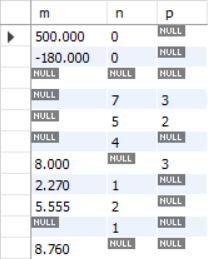

- `+ - * /`四则运算在之前的章节介绍过，此处不再赘述。

- ABS – 绝对值

语法：`ABS( 数值 )` 

ABS 函数用于计算一个数字的绝对值，表示一个数到原点的距离。  

当 ABS 函数的参数为NULL时，返回值也是NULL。  

- MOD – 求余数 
语法：`MOD( 被除数，除数 )`  

MOD 是计算除法余数（求余）的函数，是 modulo 的缩写。小数没有余数的概念，只能对整数列求余数。  

注意：主流的 DBMS 都支持 MOD 函数，只有SQL Server 不支持该函数，其使用%符号来计算余数。  

- ROUND – 四舍五入
语法：`ROUND( 对象数值，保留小数的位数 )`  

ROUND 函数用来进行四舍五入操作。  

**注意：当参数 `保留小数的位数` 为变量时，可能会遇到错误，请谨慎使用变量。**

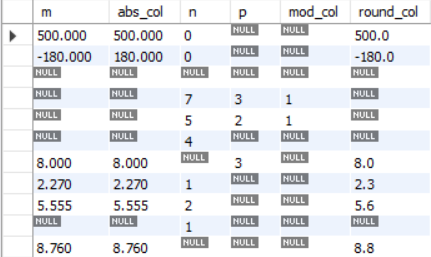

## 3.3.2 字符串函数
字符串函数也经常被使用，为了学习字符串函数，在此我们构造samplestr表。

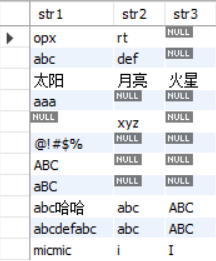

- CONCAT – 拼接

语法：`CONCAT(str1, str2, str3)`   

MySQL中使用 CONCAT 函数进行拼接。  

- LENGTH – 字符串长度  

语法：`LENGTH( 字符串 )`  

- LOWER – 小写转换  / UPPER - 大写转换

LOWER 函数只能针对英文字母使用，它会将参数中的字符串全都转换为小写。该函数不适用于英文字母以外的场合，不影响原本就是小写的字符。   

- REPLACE – 字符串的替换  

语法：`REPLACE( 对象字符串，替换前的字符串，替换后的字符串 )`  

- SUBSTRING – 字符串的截取 

语法：`SUBSTRING （对象字符串 FROM 截取的起始位置 FOR 截取的字符数）`  

使用 SUBSTRING 函数 可以截取出字符串中的一部分字符串。截取的起始位置从字符串最左侧开始计算，索引值起始为1。

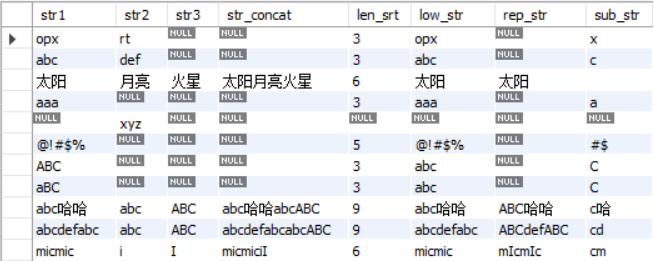

- 【扩展内容】SUBSTRING_INDEX – 字符串按索引截取

语法：SUBSTRING_INDEX (原始字符串， 分隔符，n)  

该函数用来获取原始字符串按照分隔符分割后，第 n 个分隔符之前（或之后）的子字符串，支持正向和反向索引，索引起始值分别为 1 和 -1。

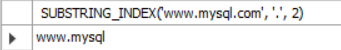

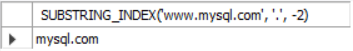

获取第1个元素比较容易，获取第2个元素/第n个元素可以采用二次拆分的写法。

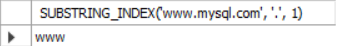

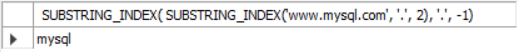

## 3.3.3 日期函数
不同DBMS的日期函数语法各有不同，本课程介绍一些被标准 SQL 承认的可以应用于绝大多数 DBMS 的函数。特定DBMS的日期函数查阅文档即可。  

- CURRENT_DATE – 获取当前日期

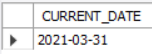

- CURRENT_TIME – 当前时间

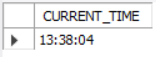

- CURRENT_TIMESTAMP – 当前日期和时间

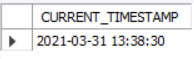

- EXTRACT – 截取日期元素

语法：`EXTRACT(日期元素 FROM 日期)`  

使用 EXTRACT 函数可以截取出日期数据中的一部分，例如“年”  

“月”，或者“小时”“秒”等。该函数的返回值并不是日期类型而是数值类型

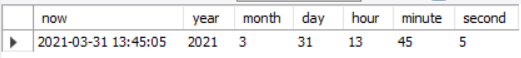

## 3.3.4 转换函数
“转换”这个词的含义非常广泛，在 SQL 中主要有两层意思：一是**数据类型的转换**，简称为类型转换，在英语中称为cast；另一层意思是**值的转换**。

- CAST – 类型转换  

语法：`CAST（转换前的值 AS 想要转换的数据类型）`

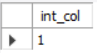

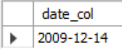

- COALESCE – 将NULL转换为其他值

语法：`COALESCE(数据1，数据2，数据3……)`

COALESCE 是 SQL 特有的函数。该函数会返回可变参数 A 中左侧开始第 1个不是NULL的值。参数个数是可变的，因此可以根据需要无限增加。  

在 SQL 语句中将 NULL 转换为其他值时就会用到转换函数。  

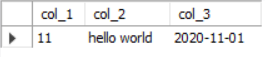

# 3.4 谓词
## 3.4.1 什么是谓词
谓词就是返回值为真值的函数。包括TRUE / FALSE / UNKNOWN。  

谓词主要有以下几个：  

- LIKE
- BETWEEN
- IS NULL、IS NOT NULL
- IN
- EXISTS

## 3.4.2 LIKE谓词 – 用于字符串的部分一致查询
当需要进行字符串的**部分一致查询**时需要使用该谓词。  

**部分一致**大体可以分为**前方一致**、**中间一致**和**后方一致**三种类型。  

首先我们来创建一张表

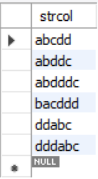

- 前方一致：选取出“dddabc”

前方一致即作为查询条件的字符串（这里是“ddd”）与查询对象字符串起始部分相同。  
其中的`%`是代表“零个或多个任意字符串”的特殊符号，本例中代表“以ddd开头的所有字符串”。

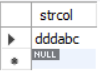

- 中间一致：选取出“abcddd”,“dddabc”,“abdddc”

中间一致即查询对象字符串中含有作为查询条件的字符串，无论该字符串出现在对象字符串的最后还是中间都没有关系。  

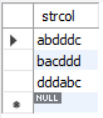

- 后方一致：选取出“abcddd“

后方一致即作为查询条件的字符串（这里是“ddd”）与查询对象字符串的末尾部分相同。

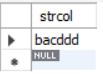

- _下划线匹配任意 1 个字符

使用 _（下划线）来代替 %，与 % 不同的是，它代表了“任意 1 个字符”。

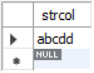

## 3.4.3 BETWEEN谓词 – 用于范围查询
使用 BETWEEN 可以进行范围查询。该谓词与其他谓词或者函数的不同之处在于它使用了 3 个参数。

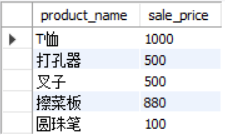

BETWEEN 的特点就是结果中会包含 100 和 1000 这两个临界值，也就是闭区间。如果不想让结果中包含临界值，那就必须使用 < 和 >。

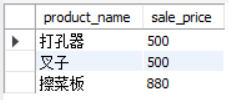

## 3.4.4 IS NULL、 IS NOT NULL – 用于判断是否为NULL
为了选取出某些值为 NULL 的列的数据，不能使用 =，而只能使用特定的谓词IS NULL。

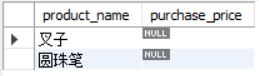

与此相反，想要选取 NULL 以外的数据时，需要使用IS NOT NULL。

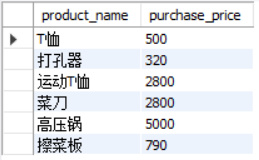

## 3.4.5 IN谓词 – OR的简便用法
多个查询条件取并集时可以选择使用or语句。

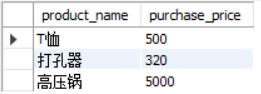

虽然上述方法没有问题，但还是存在一点不足之处，那就是随着希望选取的对象越来越多， SQL 语句也会越来越长，阅读起来也会越来越困难。这时， 我们就可以使用IN 谓词  
`IN(值1, 值2, 值3, …)`来替换上述 SQL 语句。

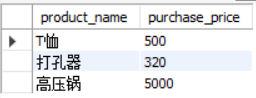

上述语句简洁了很多，可读性大幅提高。  
反之，希望选取出“进货单价不是 320 元、 500 元、 5000 元”的商品时，可以使用否定形式NOT IN来实现。

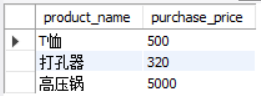

需要注意的是，在使用IN 和 NOT IN 时是无法选取出NULL数据的。  
实际结果也是如此，上述两组结果中都不包含进货单价为 NULL 的叉子和圆珠笔。 NULL 只能使用 IS NULL 和 IS NOT NULL 来进行判断。

## 3.4.6 使用子查询作为IN谓词的参数
- IN和子查询

IN 谓词（NOT IN 谓词）具有其他谓词所没有的用法，那就是可以**使用子查询作为其参数**。我们已经在 5-2 节中学习过了，子查询就是 SQL内部生成的表，因此也可以说“能够将表作为 IN 的参数”。同理，我们还可以说“能够将视图作为 IN 的参数”。  

在此，我们创建一张新表shopproduct显示出哪些商店销售哪些商品。  

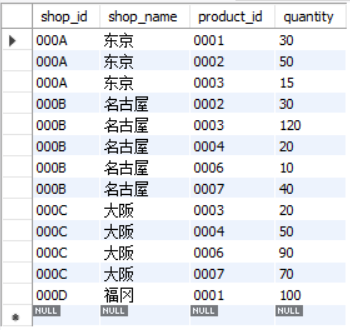

由于单独使用商店编号（shop_id）或者商品编号（product_id）不能区分表中每一行数据，因此指定了 2 列作为主键（primary key）对商店和商品进行组合，用来唯一确定每一行数据。  

假设我么需要取出大阪在售商品的销售单价，该如何实现呢？  

第一步，取出大阪门店的在售商品 `product_id` ;  

第二步，取出大阪门店在售商品的销售单价 `sale_price`;  

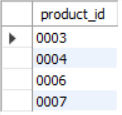

上述语句取出了大阪门店的在售商品编号，接下来，我么可以使用上述语句作为第二步的查询条件来使用了。

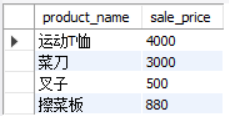

根据第5章学习的知识，子查询是从最内层开始执行的（由内而外），因此，上述语句的子查询执行之后，sql 展开成下面的语句

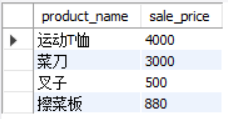

可以看到，子查询转换之后变为 in 谓词用法，你理解了吗？  
或者，你会疑惑既然 in 谓词也能实现，那为什么还要使用子查询呢？这里给出两点原因：  

①：实际生活中，某个门店的在售商品是不断变化的，使用 in 谓词就需要经常更新 sql 语句，降低了效率，提高了维护成本；  

②：实际上，某个门店的在售商品可能有成百上千个，手工维护在售商品编号真是个大工程。  

**使用子查询即可保持 sql 语句不变，极大提高了程序的可维护性，这是系统开发中需要重点考虑的内容。**

- NOT IN和子查询

NOT IN 同样支持子查询作为参数，用法和 in 完全一样。

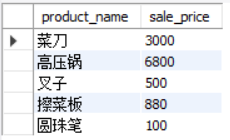

## 3.4.7 EXIST 谓词
EXIST 谓词的用法理解起来有些难度。  

① EXIST 的使用方法与之前的都不相同  

② 语法理解起来比较困难  

③ 实际上即使不使用 EXIST，基本上也都可以使用 IN（或者 NOT IN）来代替  

这么说的话，还有学习 EXIST 谓词的必要吗？答案是肯定的，因为一旦能够熟练使用 EXIST 谓词，就能体会到它极大的便利性。  
  
不过，你不用过于担心，本课程介绍一些基本用法，日后学习时可以多多留意 EXIST 谓词的用法，以期能够在达到 SQL 中级水平时掌握此用法。  

- EXIST谓词的使用方法

谓词的作用就是 “**判断是否存在满足某种条件的记录**”。  

如果存在这样的记录就返回真（TRUE），如果不存在就返回假（FALSE）。  

EXIST（存在）谓词的主语是“记录”。  

我们继续以 IN和子查询 中的示例，使用 EXIST 选取出大阪门店在售商品的销售单价。  

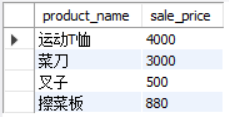

- EXIST的参数

之前我们学过的谓词，基本上都是像“列 LIKE 字符串”或者“ 列 BETWEEN 值 1 AND 值 2”这样需要指定 2 个以上的参数，而 EXIST 的左侧并没有任何参数。因为 EXIST 是只有 1 个参数的谓词。 所以，EXIST 只需要在右侧书写 1 个参数，**该参数通常都会是一个子查询**。

上面这样的子查询就是唯一的参数。确切地说，由于通过条件“SP.product_id = P.product_id”将 product 表和 shopproduct表进行了联接，因此作为参数的是关联子查询。 **EXIST 通常会使用关联子查询作为参数**。  

- 子查询中的SELECT *

由于 EXIST 只关心记录是否存在，因此返回哪些列都没有关系。 EXIST 只会判断是否存在满足子查询中 WHERE 子句指定的条件“商店编号（shop_id）为 '000C'，商品（product）表和商店  

商品（shopproduct）表中商品编号（product_id）相同”的记录，只有存在这样的记录时才返回真（TRUE）。  

因此，使用下面的查询语句，查询结果也不会发生变化。  

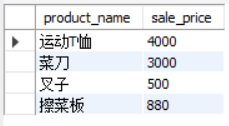

> 大家可以把在 EXIST 的子查询中书写 SELECT * 当作 SQL 的一种习惯。

- 使用NOT EXIST替换NOT IN

就像 EXIST 可以用来替换 IN 一样， NOT IN 也可以用NOT EXIST来替换。  

下面的代码示例取出，不在大阪门店销售的商品的销售单价。  

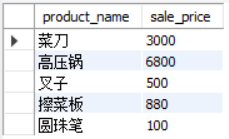

NOT EXIST 与 EXIST 相反，当“不存在”满足子查询中指定条件的记录时返回真（TRUE）。

# 3.5 CASE 表达式
## 3.5.1 什么是 CASE 表达式？
CASE 表达式是函数的一种。是 SQL 中数一数二的重要功能，有必要好好学习一下。  

CASE 表达式是在区分情况时使用的，这种情况的区分在编程中通常称为（条件）分支。  

CASE表达式的语法分为简单CASE表达式和搜索CASE表达式两种。由于搜索CASE表达式包含简单CASE表达式的全部功能。本课程将重点介绍搜索CASE表达式。  

语法：  

上述语句执行时，依次判断 when 表达式是否为真值，是则执行 THEN 后的语句，如果所有的 when 表达式均为假，则执行 ELSE 后的语句。
无论多么庞大的 CASE 表达式，最后也只会返回一个值。

## 3.5.2 CASE表达式的使用方法
假设现在 要实现如下结果：

因为表中的记录并不包含“A ： ”或者“B ： ”这样的字符串，所以需要在 SQL 中进行添加。并将“A ： ”“B ： ”“C ： ”与记录结合起来。

- 应用场景1：根据不同分支得到不同列值

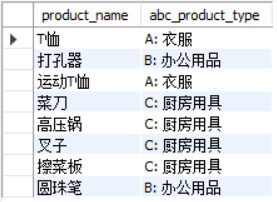

ELSE 子句也可以省略不写，这时会被默认为 ELSE NULL。但为了防止有人漏读，还是希望大家能够显示地写出 ELSE 子句。
此外， CASE 表达式最后的“END”是不能省略的，请大家特别注意不要遗漏。忘记书写 END 会发生语法错误，这也是初学时最容易犯的错误。  

- 应用场景2：实现列方向上的聚合

通常我们使用如下代码实现行的方向上不同种类的聚合（这里是 sum）

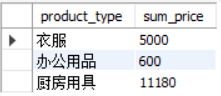

假如要在列的方向上展示不同种类额聚合值，该如何写呢？

聚合函数 + CASE WHEN 表达式即可实现该效果

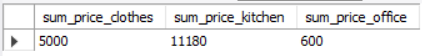

- 【扩展内容】应用场景3：实现行转列

假设有如下图表的结构  
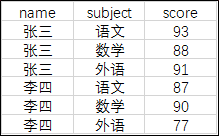  
计划得到如下的图表结构  
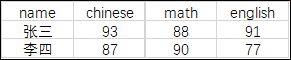  
聚合函数 + CASE WHEN 表达式即可实现该转换

上述代码实现了数字列 score 的行转列，也可以实现文本列 subject 的行转列

**总结**：

- **当待转换列为数字时，可以使用`SUM AVG MAX MIN`等聚合函数；**
- **当待转换列为文本时，可以使用`MAX MIN`等聚合函数**

# 练习题-第二部分
## 3.5
运算或者函数中含有 NULL 时，结果全都会变为NULL ？（判断题）  

## 3.6
对本章中使用的 product（商品）表执行如下 2 条 SELECT 语句，能够得到什么样的结果呢？

①

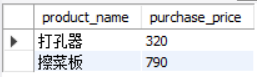

②

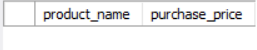

## 3.7
按照销售单价（ sale_price）对练习 6.1 中的 product（商品）表中的商品进行如下分类。  

- 低档商品：销售单价在1000日元以下（T恤衫、办公用品、叉子、擦菜板、 圆珠笔）
- 中档商品：销售单价在1001日元以上3000日元以下（菜刀）
- 高档商品：销售单价在3001日元以上（运动T恤、高压锅）

请编写出统计上述商品种类中所包含的商品数量的 SELECT 语句，结果如下所示。  

执行结果  

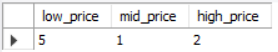